In [8]:
import torch
from matplotlib import pyplot as plt


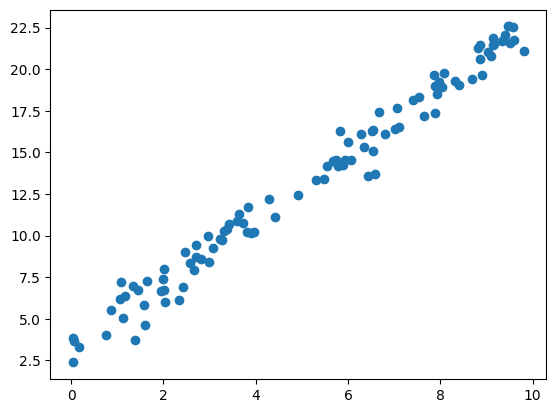

In [15]:
torch.manual_seed(42)
x = torch.rand(100, 1) * 10  # 100 data points between 0 and 10
y = 2 * x + 3 + torch.randn(100, 1)  # Linear relationship with noise
plt.figure()
plt.scatter(x, y)

In [16]:
class CustomActivation(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = torch.nn.Linear(1, 1)

    def forward(self, x):
        x = self.layer(x)
        return x + torch.tanh(x)

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, x, y):
        super().__init__()
        self.x = x
        self.y = y
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]

In [17]:
train_dataset = CustomDataset(x, y)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=100, shuffle=True)
epochs = 1000
model = CustomActivation()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
mse = torch.nn.MSELoss()
for epoch in range(epochs):
    for x_train, y_train in train_loader:
        pred = model(x_train)
        loss = mse(pred, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if epoch % 100 == 0:
        print(f"epoch {epoch}, loss {loss}")


epoch 0, loss 179.85333251953125
epoch 100, loss 1.0510516166687012
epoch 200, loss 0.8016936779022217
epoch 300, loss 0.7145124077796936
epoch 400, loss 0.6824085712432861
epoch 500, loss 0.6703880429267883
epoch 600, loss 0.6658565998077393
epoch 700, loss 0.6641427874565125
epoch 800, loss 0.6634933948516846
epoch 900, loss 0.6632470488548279
